In [1]:
library(tidyverse)
library(here)
library(cowplot)

devtools::load_all(".")

theme_set(theme_grey())

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/ychr

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading ychr


In [2]:
trajectories <-
    list.files(here("data/sim"), "txt", full.names = TRUE) %>%
    map_dfr(function(f) {
        chrom <- str_extract(f, "[AXY]")
        admix_rate <- str_extract(f, "rate[^_]+") %>% str_replace("rate", "") %>% as.numeric
        direction <- str_extract(basename(f), "^[^_]+")
        rep <- str_extract(f, "rep\\d+") %>% str_replace("rep", "") %>% as.integer

        df <- read_tsv(f, col_types = "idd")
        if (tail(df, 1)$gen != 2200) return(NULL)

        df %>% mutate(chrom = chrom, admix_rate = admix_rate, direction = direction, rep = rep)

    })

In [19]:
avg_trajectories <- trajectories %>%
    group_by(gen, chrom, admix_rate, direction) %>%
    summarise(modern = mean(modern), archaic = mean(archaic))

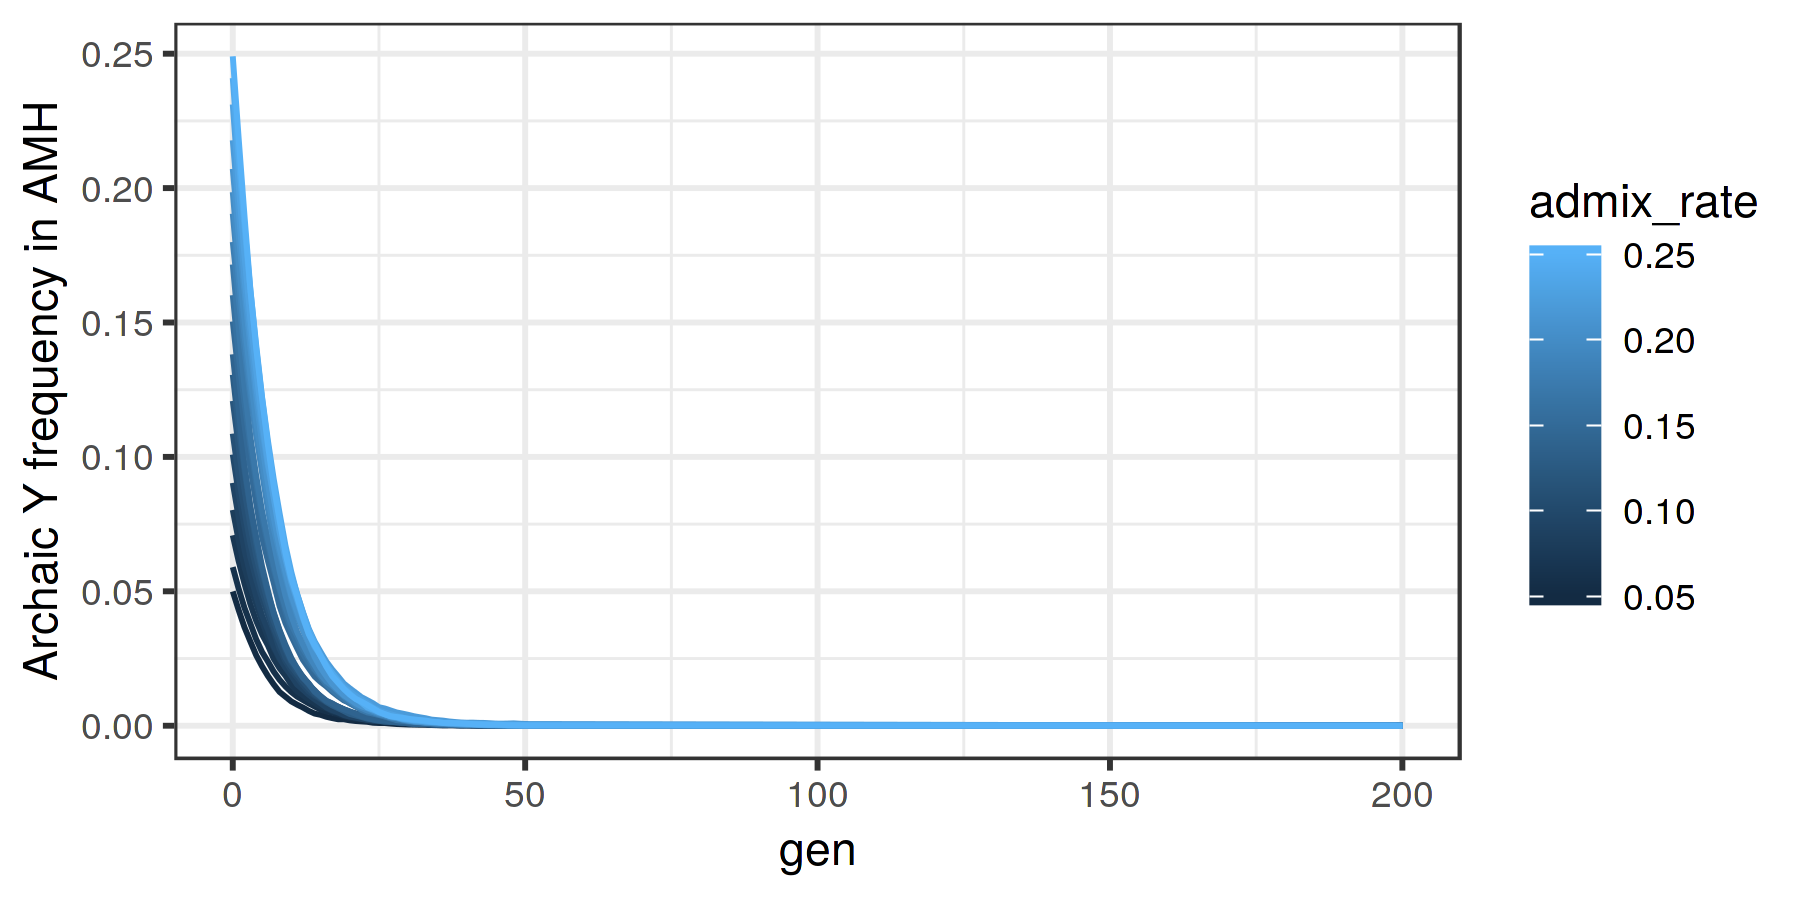

In [32]:
set_dim(6, 3)

filter(avg_trajectories, direction == "archaic2modern", admix_rate >= 0.05, gen < 300) %>%
    ggplot(aes(gen, modern, color = admix_rate)) +
    geom_line(aes(group = admix_rate)) +
    ylab("Archaic Y frequency in AMH") + xlab("generations after admixture") +
    theme_bw()

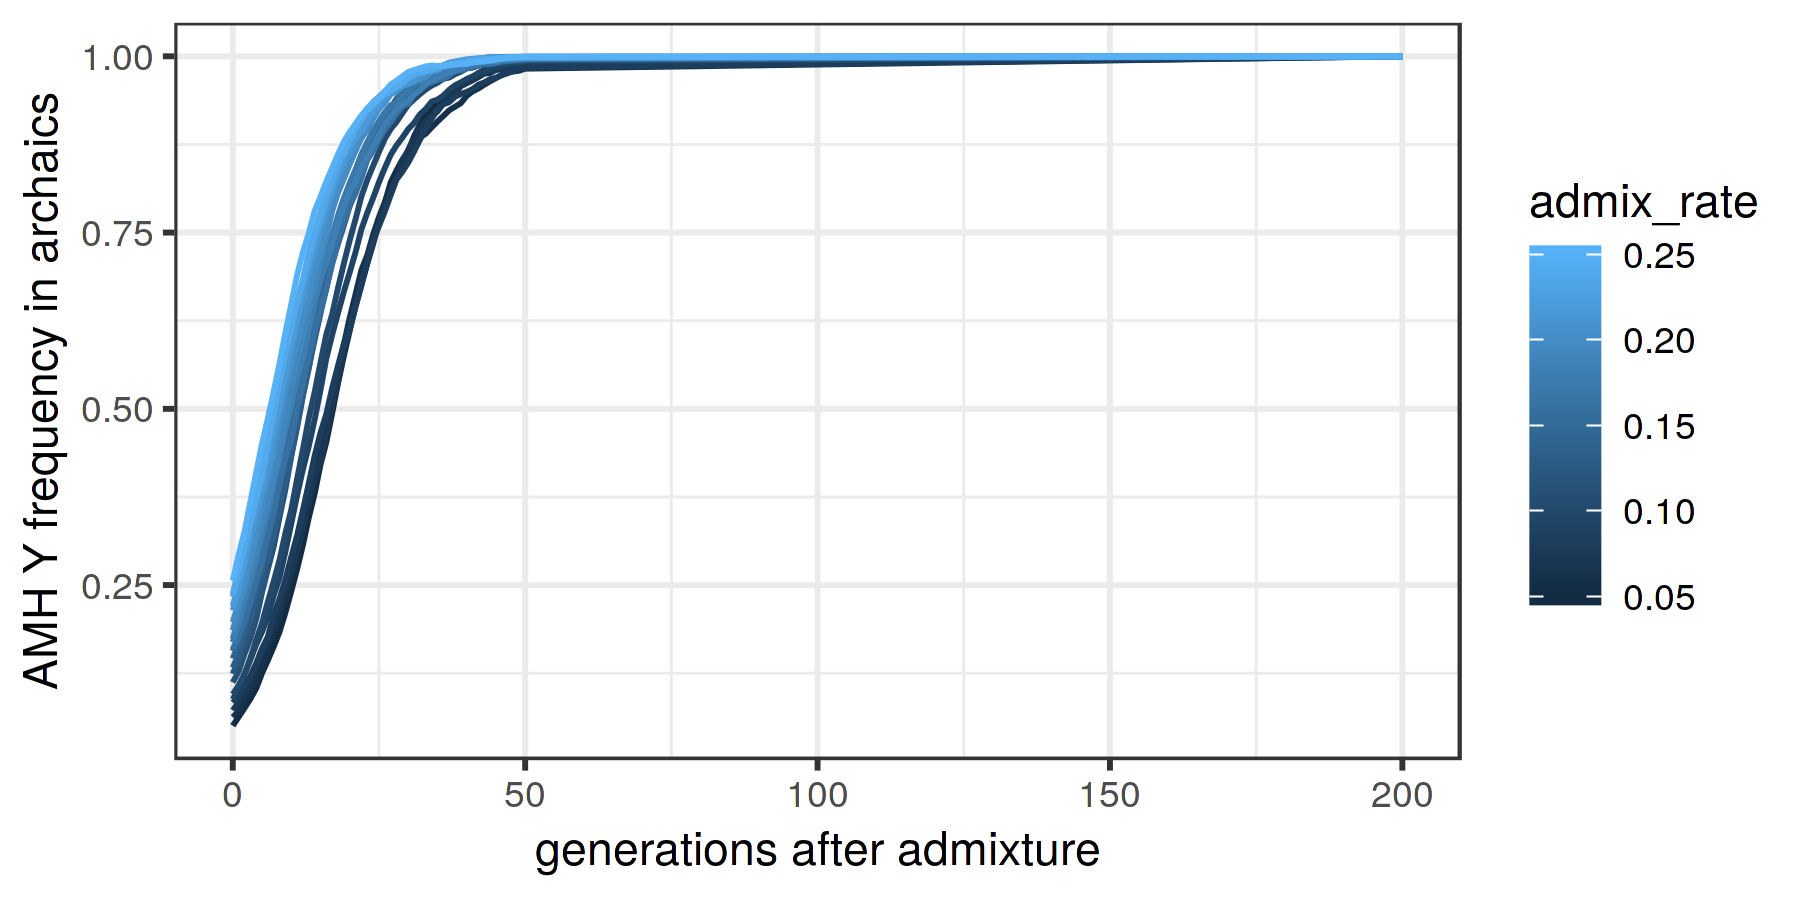

In [34]:
set_dim(6, 3)

filter(avg_trajectories, direction == "modern2archaic", admix_rate >= 0.05, gen < 300) %>%
    ggplot(aes(gen, archaic, color = admix_rate)) +
    geom_line(aes(group = admix_rate)) +
    ylab("AMH Y frequency in archaics") + xlab("generations after admixture") +
    theme_bw()